# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [2]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT count(ProductName)
    FROM Products
    WHERE Price < 10;
""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [10]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, count(SupplierID) SupplierCount
    FROM Suppliers
    GROUP BY Country
    ORDER BY SupplierCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


[Text(0.5, 1.0, 'Most Frequent Countries by Suppliers')]

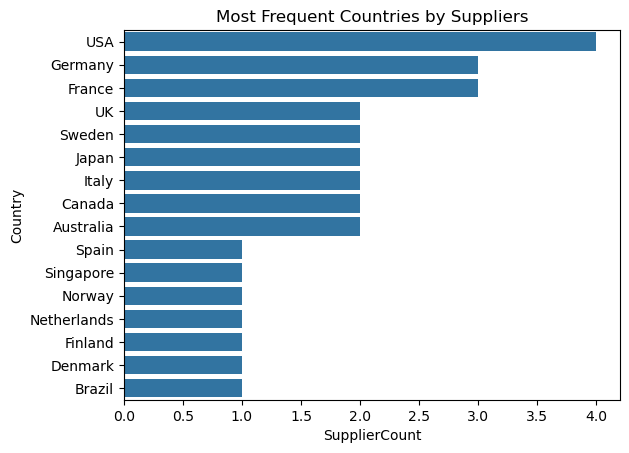

In [14]:
# # TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'SupplierCount'])
df.set_index("Country", inplace=True)
# # TODO: Generate a visualization on this dataframe
sns.barplot(df, x="SupplierCount", y="Country").set(title='Most Frequent Countries by Suppliers')

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [29]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, count(Country) as CountryCount
    FROM Customers
    GROUP BY Country
    ORDER BY CountryCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


[Text(0.5, 1.0, 'Most Frequent Countries')]

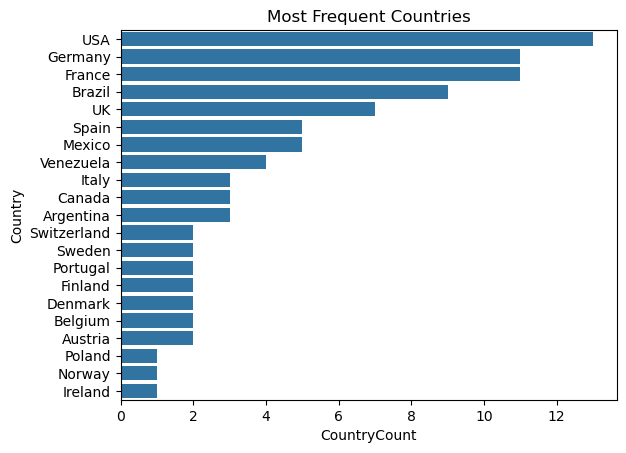

In [31]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'CountryCount'])
df.set_index('Country', inplace=True)
# TODO: Generate a visualization on this dataframe
sns.barplot(df, x="CountryCount", y="Country").set(title='Most Frequent Countries')

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [32]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT ProductName, SUM(o.Quantity) as OrderedQuantity
    FROM OrderDetails o JOIN Products p
    ON o.ProductID = p.ProductID
    GROUP BY ProductName
    ORDER BY OrderedQuantity ASC
    LIMIT 20;
""")


# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]


[Text(0.5, 1.0, 'Least Popular Products by Quantity')]

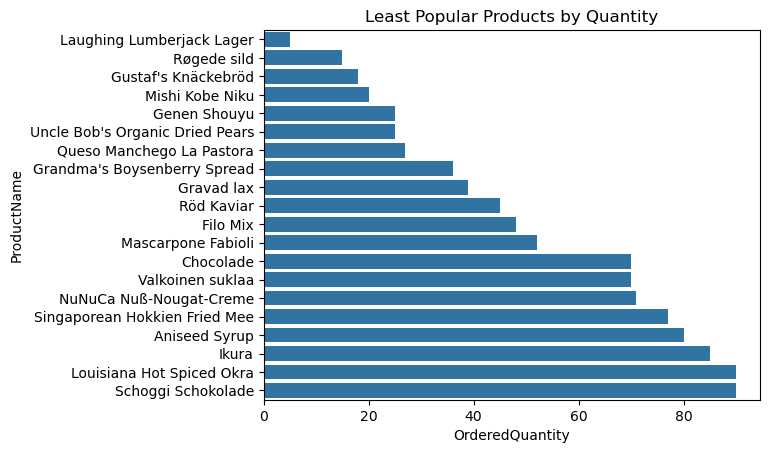

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'OrderedQuantity'])
df.set_index('ProductName', inplace=True)
# TODO: Generate a visualization on this dataframe
sns.barplot(df, x="OrderedQuantity", y="ProductName").set(title='Least Popular Products by Quantity')

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [34]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT ProductName, SUM(o.Quantity) * p.Price as Revenue
    FROM OrderDetails o JOIN Products p
    ON o.ProductID = p.ProductID
    GROUP BY ProductName
    ORDER BY Revenue ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5)]


[Text(0.5, 1.0, 'Least Popular Products by Revenue')]

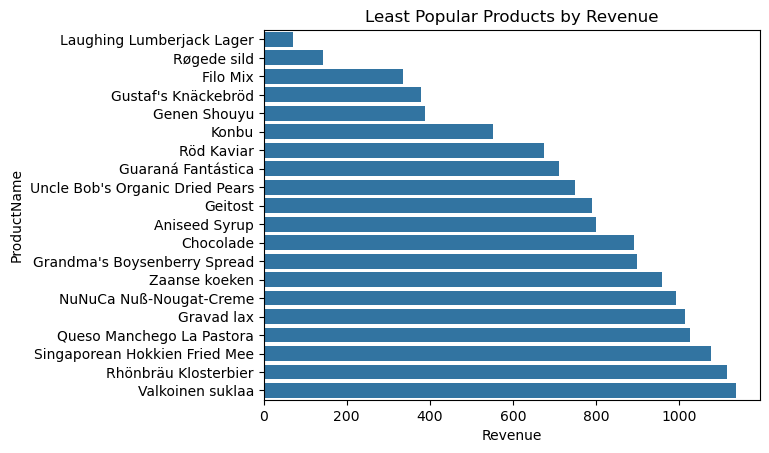

In [36]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'Revenue'])
df.set_index('ProductName', inplace=True)

# TODO: Generate a visualization on this dataframe
sns.barplot(df, x="Revenue", y="ProductName").set(title='Least Popular Products by Revenue')

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [39]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(OrderID) as OrderCount
    FROM Orders o JOIN Customers c
    ON o.CustomerID = c.CustomerID
    GROUP BY Country
    ORDER BY OrderCount DESC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1)]


[Text(0.5, 1.0, 'Countries with the Most Orders')]

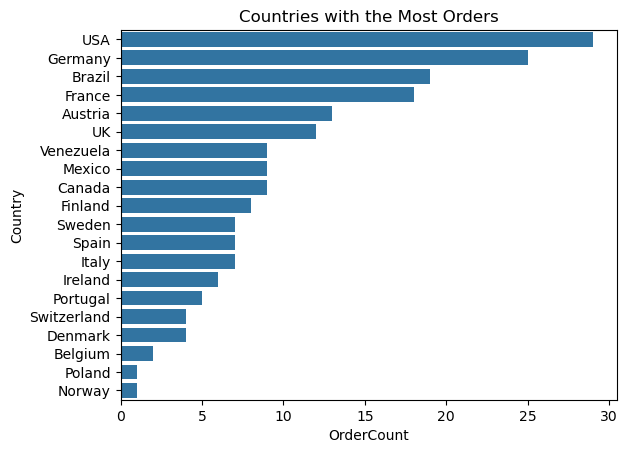

In [40]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'OrderCount'])
df.set_index('Country', inplace=True)

# TODO: Generate a visualization on this dataframe
sns.barplot(df, x="OrderCount", y="Country").set(title='Countries with the Most Orders')

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(c.CustomerID) as CustomersWithoutOrders
    FROM Customers c LEFT JOIN Orders o
    ON c.CustomerID = o.CustomerID
    WHERE OrderID IS NULL
    GROUP BY Country;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Argentina', 2), ('Belgium', 1), ('Canada', 1), ('France', 4), ('Germany', 2), ('Spain', 1), ('UK', 1), ('USA', 5)]


[Text(0.5, 1.0, 'Countries with Customers Who Do Not Orders')]

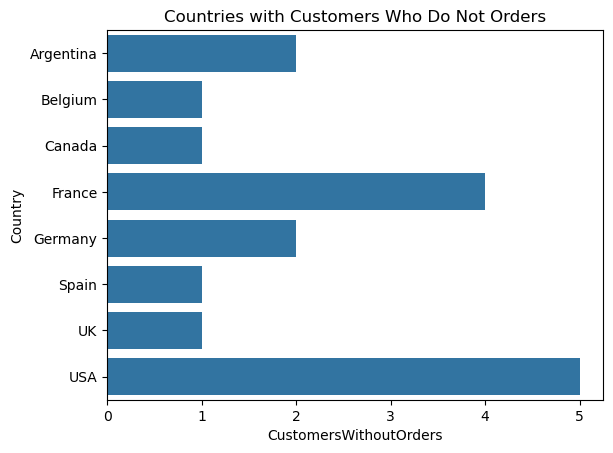

In [45]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'CustomersWithoutOrders'])
df.set_index('Country', inplace=True)

# TODO: Generate a visualization on this dataframe
sns.barplot(df, x="CustomersWithoutOrders", y="Country").set(title='Countries with Customers Who Do Not Orders')

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [23]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT SupplierName, COUNT(OrderDetailID) as OrderCount
    FROM OrderDetails od JOIN Suppliers s JOIN Products p
    ON od.ProductID = p.ProductID AND p.SupplierID = s.SupplierID
    GROUP BY SupplierName 
    ORDER BY OrderCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 19), ('New England Seafood Cannery', 17), ("Mayumi's", 17), ('Leka Trading', 17), ('Bigfoot Breweries', 16), ('Heli Süßwaren GmbH & Co. KG', 15), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Svensk Sjöföda AB', 14), ('Tokyo Traders', 12), ('Refrescos Americanas LTDA', 11), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('Lyngbysild', 8), ('PB Knäckebröd AB', 6), ("Grandma Kelly's Homestead", 6), ('Zaanse Snoepfabriek', 4), ('Escargots Nouveaux', 4)]


[Text(0.5, 1.0, 'Most Popular Suppliers')]

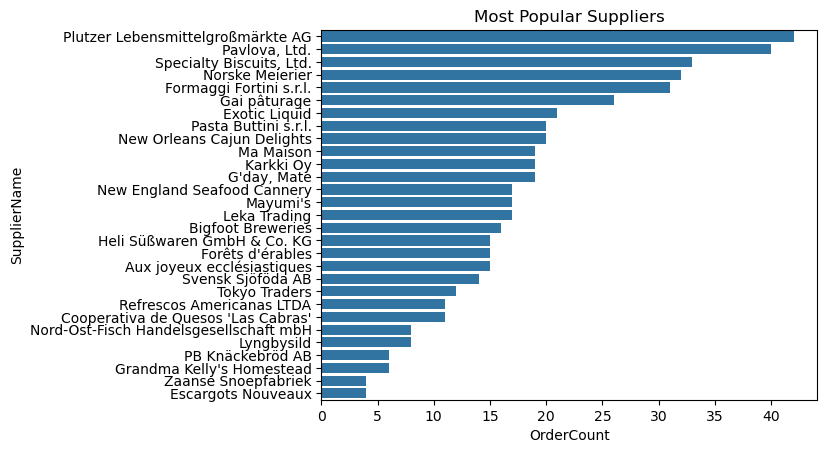

In [24]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['SupplierName', 'OrderCount'])
df.set_index('SupplierName', inplace=True)

# TODO: Generate a visualization on this dataframe
sns.barplot(df, x="OrderCount", y="SupplierName").set(title='Most Popular Suppliers')

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers?How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

According to the graphs for Question 3 above, the top countries with the greatest number of number of customers are USA, Germany, and France. The graph for the most frequent countries by suppliers for Question 2 also shows the USA, Germany, and France ranked the top. After rankings after 4, the countries do not exactly match in ranking. However, we see that most countries that appeared in Q2's graph also appear in Q3's graph, means that the number of suppliers in a country do correlate with the number of customers in the country.

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

According to the graph in Q4, the least popular product is Laughing Lumberjack Lager. From the graph for the least popular product by revenue in Q5, we can see that most products found in Q5's graph can also be found in Q4's graph. Therefore, the quantity of the product ordered does correlate with its revenue.

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

According to the graph for Q6, the country with the most order is the USA, followed by Germany. The graph for Q7 shows that the country with the most people who never ordered is also the USA. However, there are relatively less countries in Q6's graph showed up in Q7's graph than the previous two comparisons.

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

According to the graph for Q8, the supplier with the most orders is "Plutzer Lebensmittelgroßmärkte AG."